In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [12]:
iris = datasets.load_iris()

In [13]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [15]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [101]:
data = pd.DataFrame(iris.data, columns = iris.feature_names)

In [102]:
data

,0,1,2,3
0,5.1,3.5,1.4,0.2
0,4.9,3.0,1.4,0.2
0,4.7,3.2,1.3,0.2
0,4.6,3.1,1.5,0.2
0,5.0,3.6,1.4,0.2
...,...,...,...,...
2,6.7,3.0,5.2,2.3
2,6.3,2.5,5.0,1.9
2,6.5,3.0,5.2,2.0
2,6.2,3.4,5.4,2.3


In [23]:
data['target'] = iris.target

In [31]:
data[:50].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
data[50:100].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [29]:
data[100:].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [28]:
data0 = data[:50]
data1 = data[50:100]
data2 = data[100:]

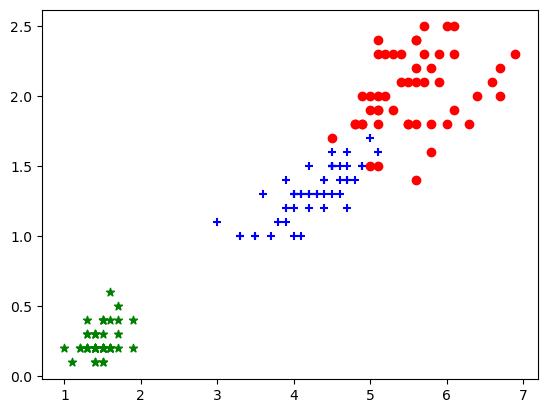

In [41]:
plt.scatter(data0['petal length (cm)'], data0['petal width (cm)'], marker = '*', color = 'green')
plt.scatter(data1['petal length (cm)'], data1['petal width (cm)'], marker = '+', color = 'blue')
plt.scatter(data2['petal length (cm)'], data2['petal width (cm)'], color = 'red')

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop('target', axis = 'columns'), data.target, test_size = 0.2, random_state = 1)

In [62]:
len(x_train)

120

In [63]:
len(x_test)

30

In [64]:
len(y_train)

120

In [65]:
len(x_test)

30

In [66]:
data.shape

(150, 5)

In [72]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 20)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [73]:
model.score(x_test, y_test)

0.9666666666666667

In [94]:
!pip install seaborn --downgrade


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --downgrade


In [91]:
y_predict = model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm


array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [92]:
 pip3 install seaborn==0.9.0

SyntaxError: invalid syntax (1205901067.py, line 1)

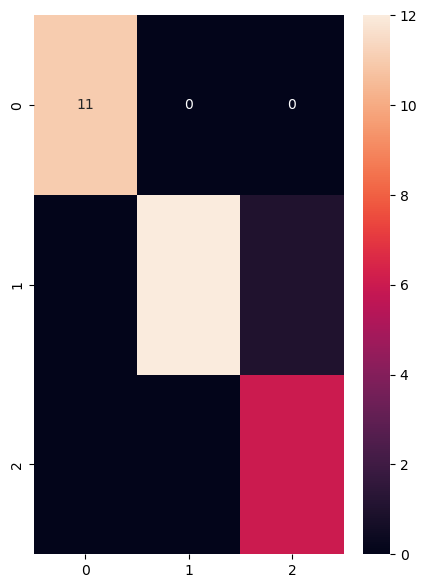

In [93]:
%matplotlib inline
import seaborn as sb
plt.figure(figsize = (5, 7))
sb.heatmap(cm, annot = True)
plt.xlabel = "Predict"
plt.ylabel = 'Truth'

In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

